# Building and Evaluating Regression Model

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

### Load and read dataset 

In [2]:
house_data = pd.read_csv('datasets/kc_house_data_processed.csv')

house_data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,sqft_living15,sqft_lot15,house_age,renovated
0,221900,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1340,5650,59,0
1,538000,3,2.25,2570,7242,2.0,0,0,3,7,2170,1,1690,7639,63,1
2,180000,2,1.00,770,10000,1.0,0,0,3,6,770,0,2720,8062,82,0
3,604000,4,3.00,1960,5000,1.0,0,0,5,7,1050,1,1360,5000,49,0
4,510000,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1800,7503,28,0


### Shape of datasets

In [3]:
house_data.shape

(21613, 16)

### Describing Dataset

In [4]:
house_data.describe().T

,count,mean,std,min,25%,50%,75%,max
price,21613.0,540088.141767,367127.196483,75000.0,321950.00,450000.00,645000.0,7700000.0
bedrooms,21613.0,3.370842,0.930062,0.0,3.00,3.00,4.0,33.0
bathrooms,21613.0,2.114757,0.770163,0.0,1.75,2.25,2.5,8.0
sqft_living,21613.0,2079.899736,918.440897,290.0,1427.00,1910.00,2550.0,13540.0
sqft_lot,21613.0,15106.967566,41420.511515,520.0,5040.00,7618.00,10688.0,1651359.0
floors,21613.0,1.494309,0.539989,1.0,1.00,1.50,2.0,3.5
waterfront,21613.0,0.007542,0.086517,0.0,0.00,0.00,0.0,1.0
view,21613.0,0.234303,0.766318,0.0,0.00,0.00,0.0,4.0
condition,21613.0,3.409430,0.650743,1.0,3.00,3.00,4.0,5.0
grade,21613.0,7.656873,1.175459,1.0,7.00,7.00,8.0,13.0


### Seperate target value and features value

In [5]:
target = house_data['price']

features = house_data.drop(['price'], axis=1)

### Split dataset into train test dataset

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=.2, random_state=2)

### size of training dataset

In [7]:
X_train.shape, y_train.shape

((17290, 15), (17290,))

### Size of testig dataset

In [8]:
X_test.shape, y_test.shape

((4323, 15), (4323,))

### Import libraries

In [9]:
from math import sqrt
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

### Creating a function for adjusted_r2 score

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.adjusted_rand_score.html

In [10]:
def adjusted_r2(r_square, labels, features):
    adj_r_square = 1 - ((1 - r_square) * (len(labels) - 1)) / (len(labels) - features.shape[1] - 1)
    
    return adj_r_square

### Creating a function for best model and r_score

In [11]:
def build_and_evaluate_model(model, X_train, y_train, X_test, y_test):
 
    model = model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    print('Training R2:{}'.format(model.score(X_train, y_train)))
    
    print()
    
    test_r2_score = r2_score(y_test, y_pred)
    print('Testing R2: {}'.format(test_r2_score))
    print('Testing adjusted R2: {}'.format(adjusted_r2(test_r2_score, y_test, X_test)))

    print()
    
    print('Mean square error: {}'.format(mean_squared_error(y_test, y_pred)))
    print('Root mean square error: {}'.format(sqrt(mean_squared_error(y_test, y_pred))))
    print('Mean Absolute error: {}'.format(mean_absolute_error(y_test, y_pred) ))
    
    return y_pred  

### Import models

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor

### Linear Regression model 

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [13]:
linear_regression = LinearRegression()

y_pred = build_and_evaluate_model(linear_regression, X_train, y_train, X_test, y_test)

Training R2:0.6486336700779416

Testing R2: 0.6743911432549375
Testing adjusted R2: 0.6732571444503923

Mean square error: 45457666096.3983
Root mean square error: 213208.0347838662
Mean Absolute error: 139436.26685299937


### Dataframe for test values and expected values

In [14]:
df = pd.DataFrame({'Test': y_test, 'Predicted': y_pred})

df.sample(10)

,Test,Predicted
14074,562100,5.422425e+05
11082,344950,4.791834e+05
18411,630000,4.597592e+05
7550,1485000,1.000328e+06
10724,251000,3.701520e+05
18386,390000,2.756323e+05
14436,234000,3.077886e+05
9598,130000,1.789298e+05
9429,327000,3.574275e+05
13410,269000,1.423839e+05


### Scatter plot for test values and expected values

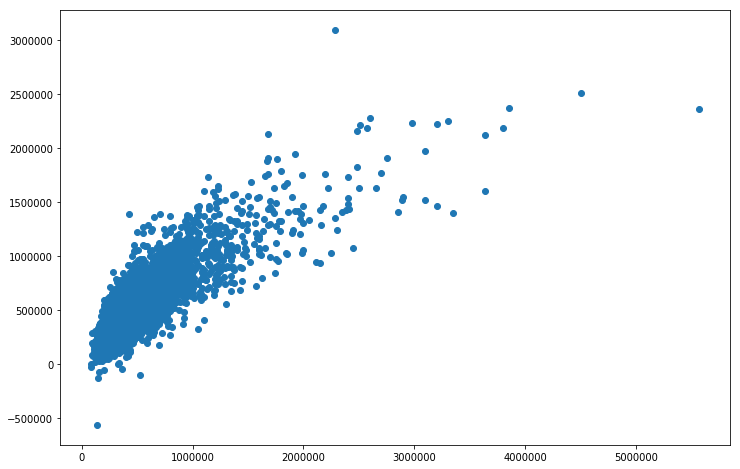

In [15]:
plt.figure(figsize=(12, 8))

plt.scatter(y_test.values, y_pred)
plt.show()

### finde residual plot of expected value and test value

In [16]:
def residuals_plot(trained_estimator, X_train, y_train, X_test, y_test):
    plt.figure(figsize=(12, 8))

    y_train_pred = trained_estimator.predict(X_train)
    plt.scatter(y_train_pred, 
                y_train_pred - y_train, c='red', 
                label='Training data')

    y_pred = trained_estimator.predict(X_test)
    plt.scatter(y_pred, y_pred - y_test, c='Green', label='Testing')
    plt.legend()

    plt.hlines(y=0, xmin=y_test.min(), xmax=y_test.max())

    plt.title('Residual Plot', fontsize=20)
    plt.show()

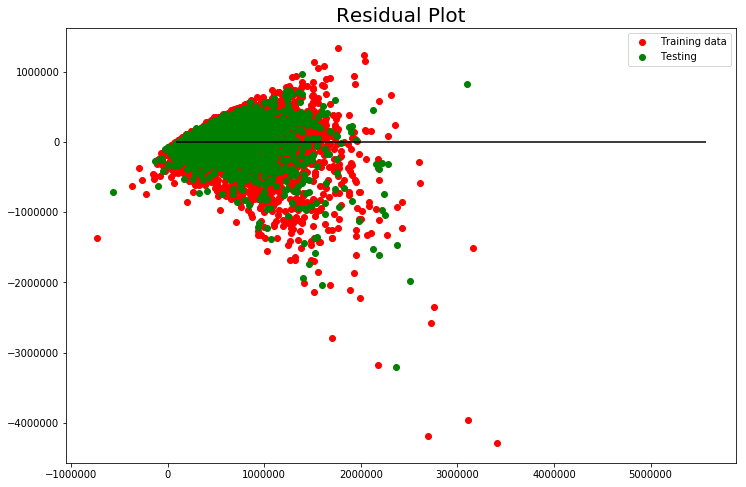

In [17]:
residuals_plot(linear_regression, X_train, y_train, X_test, y_test)

### Learning curve function

https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html

In [18]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

def draw_learning_curves(X, y, estimator, cv=None):
    
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, 
                                                            train_sizes=np.linspace(.1, 1.0, 10))
    plt.figure(figsize=(12, 8))
    
    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)

    plt.grid(True)

    plt.title("Learning Curves", fontsize=22)
    plt.xlabel("Training examples")
    plt.ylabel("Score")

    plt.plot(train_scores_mean, 'o-', color="g",
             label="Training score")
    plt.plot(test_scores_mean, 'o-', color="y",
             label="Testing score")


    plt.legend(loc="best")

    plt.show()
    
    return train_scores_mean, test_scores_mean

### Cross validation

In [19]:
cv = ShuffleSplit(n_splits=10)

cv

ShuffleSplit(n_splits=10, random_state=None, test_size='default',
       train_size=None)

### Learning curve for Linear regression

https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html

#### By the observation of diagram and mean training and testing score we find that this model is right fit beacuse at last training score and testing score aprox.

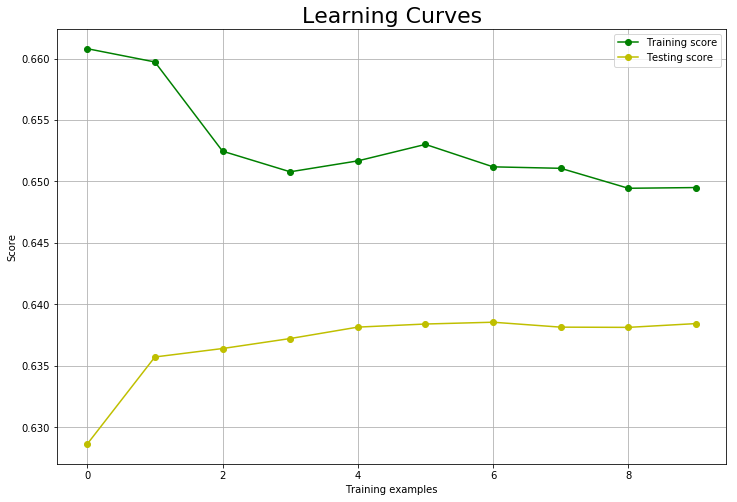

In [20]:
train_score, test_score = draw_learning_curves(X_train, y_train, linear_regression, cv)

In [21]:
print('Training score mean: ', train_score)
print('Testing score mean: ', test_score)

Training score mean:  [0.66080131 0.65972078 0.65246427 0.65078467 0.65167305 0.65301387
 0.65118825 0.65106873 0.64944455 0.64950245]
Testing score mean:  [0.62863559 0.63571831 0.63640589 0.63721869 0.63814802 0.63840012
 0.63854676 0.63814572 0.63812728 0.63843471]


### Predict values by DecisionTreeRegression 
https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html#sklearn.tree.DecisionTreeRegressor

In [22]:
decision_tree = DecisionTreeRegressor()

y_pred = build_and_evaluate_model(decision_tree, X_train, y_train, X_test, y_test)

Training R2:0.9999350991913127

Testing R2: 0.46599716706374894
Testing adjusted R2: 0.46413739402124987

Mean square error: 74551173812.67291
Root mean square error: 273040.6083583043
Mean Absolute error: 160986.45500809624


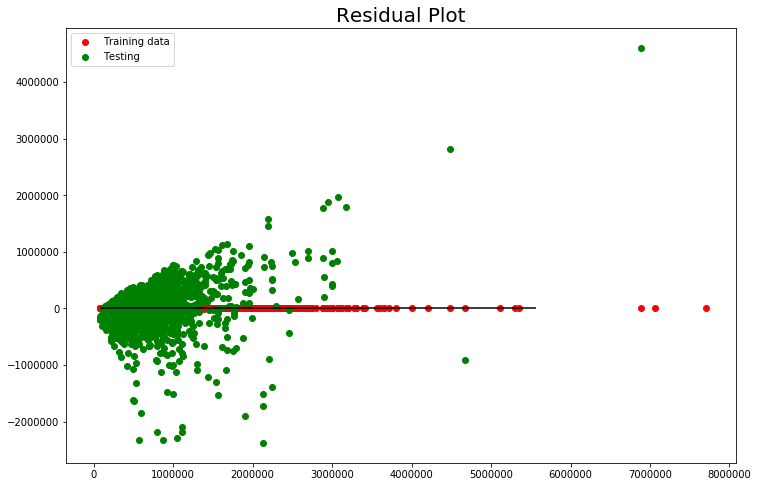

In [23]:
residuals_plot(decision_tree, X_train, y_train, X_test, y_test)

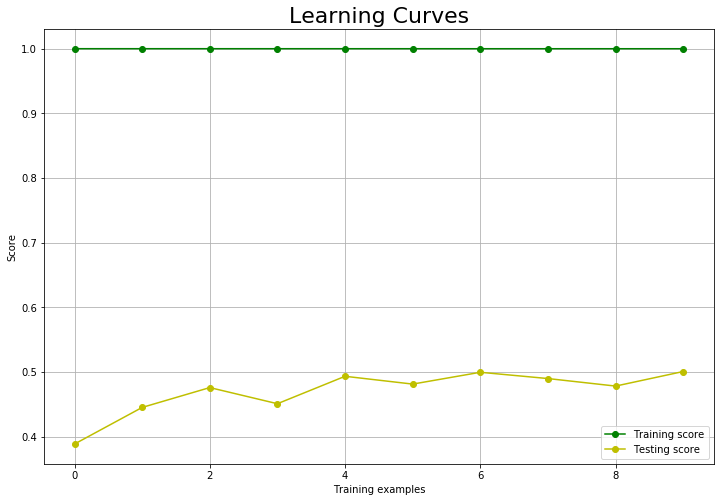

In [24]:
train_score, test_score = draw_learning_curves(X_train, y_train, decision_tree, cv)

### Decision tree regression with max_depth = 7

In [25]:
decision_tree_7 = DecisionTreeRegressor(max_depth=7)

y_pred = build_and_evaluate_model(decision_tree_7, X_train, y_train, X_test, y_test)

Training R2:0.756109096688151

Testing R2: 0.605504854120153
Testing adjusted R2: 0.6041309448589044

Mean square error: 55074756864.17414
Root mean square error: 234680.11603920377
Mean Absolute error: 135266.64646275903


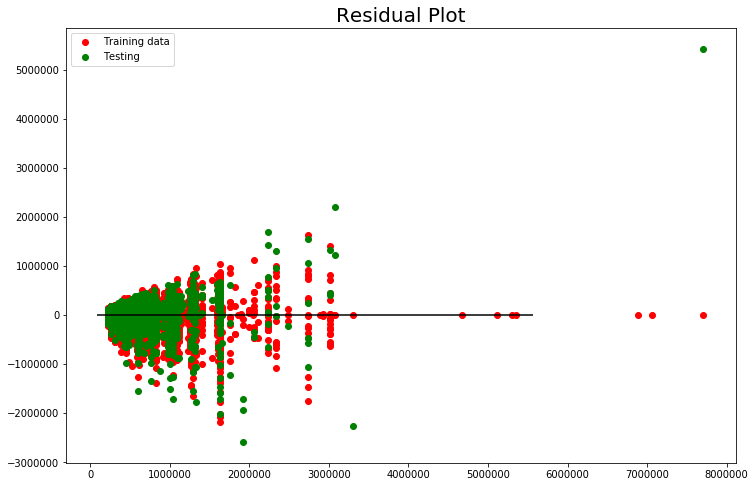

In [26]:
residuals_plot(decision_tree_7, X_train, y_train, X_test, y_test)

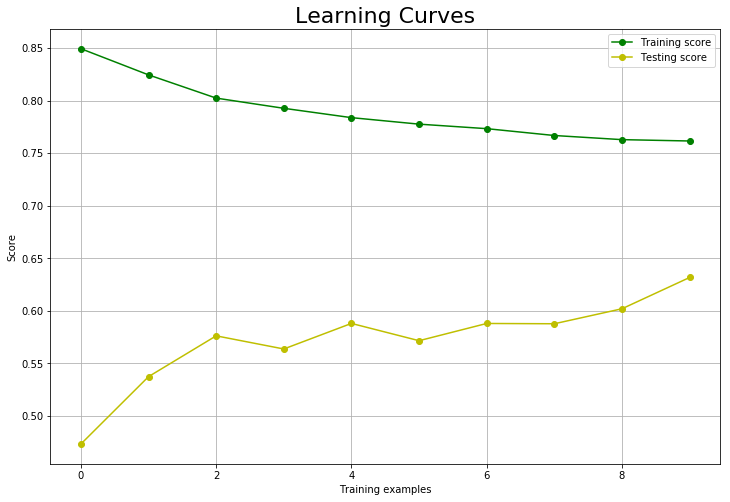

In [27]:
train_score, test_score = draw_learning_curves(X_train, y_train, decision_tree_7, cv)

### KNeighborsRegressor

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html

In [28]:
k_neighbors = KNeighborsRegressor(n_neighbors=5)

y_pred = build_and_evaluate_model(k_neighbors, X_train, y_train, X_test, y_test)

Training R2:0.657972038791501

Testing R2: 0.5296265817363018
Testing adjusted R2: 0.5279884110202685

Mean square error: 65667985821.38668
Root mean square error: 256257.65514689835
Mean Absolute error: 158482.78343742772


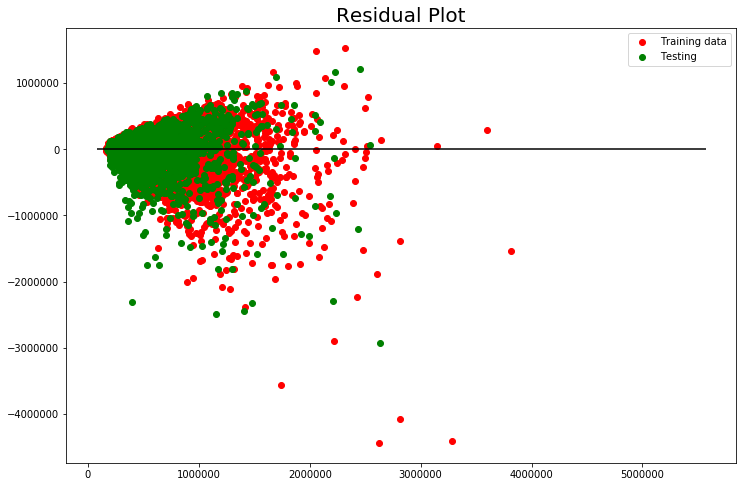

In [29]:
residuals_plot(k_neighbors, X_train, y_train, X_test, y_test)

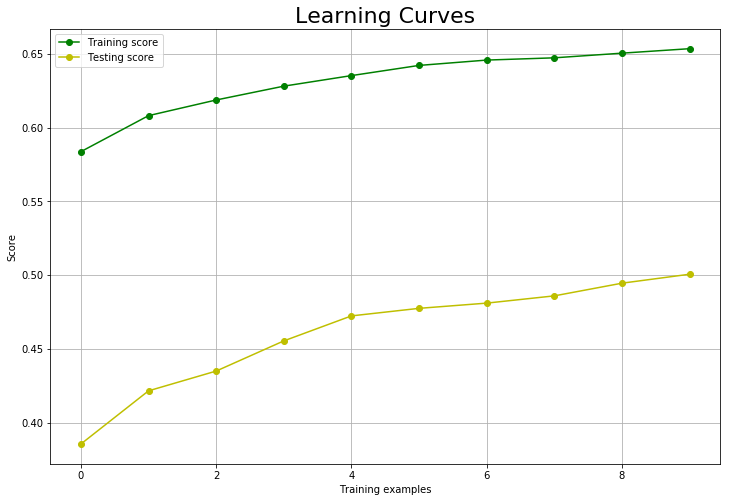

In [30]:
train_score, test_score = draw_learning_curves(X_train, y_train, k_neighbors, cv)

### GradientBoostingRegressor

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html

In [31]:
gb_regressor_5 = GradientBoostingRegressor(n_estimators=5)

y_pred = build_and_evaluate_model(gb_regressor_5, X_train, y_train, X_test, y_test)

Training R2:0.38796189514626733

Testing R2: 0.37762406718088914
Testing adjusted R2: 0.37545651691567283

Mean square error: 86888783134.90341
Root mean square error: 294769.0335413532
Mean Absolute error: 184100.1790148872


### Residual plot for `GradientBoostingRegressor` model

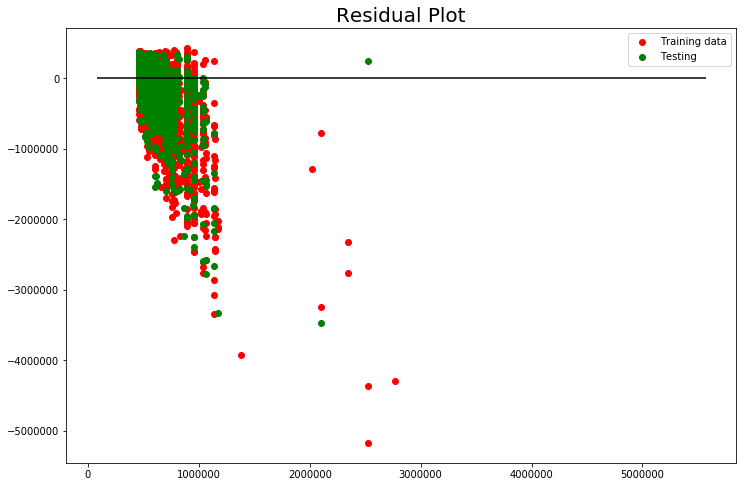

In [32]:
residuals_plot(gb_regressor_5, X_train, y_train, X_test, y_test)

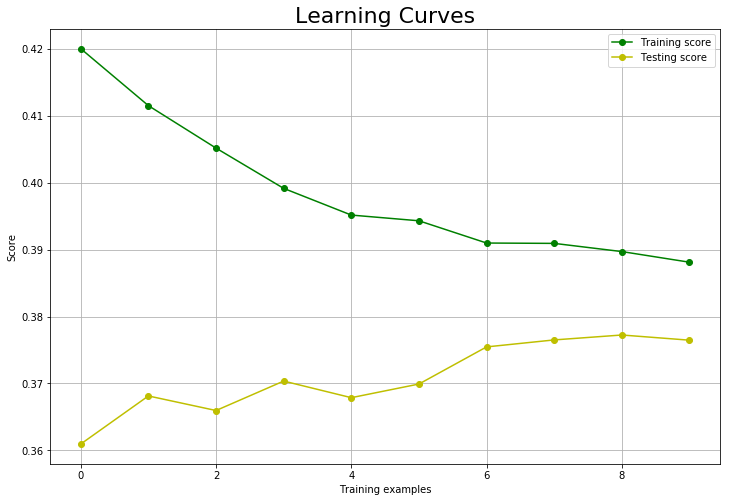

In [33]:
train_score, test_score = draw_learning_curves(X_train, y_train, gb_regressor_5, cv)

In [34]:
gb_regressor_100 = GradientBoostingRegressor()

y_pred = build_and_evaluate_model(gb_regressor_100, X_train, y_train, X_test, y_test)

Training R2:0.7931608213693795

Testing R2: 0.7313415480593011
Testing adjusted R2: 0.7304058905763406

Mean square error: 37506922644.482864
Root mean square error: 193667.04067673173
Mean Absolute error: 121107.75210710107


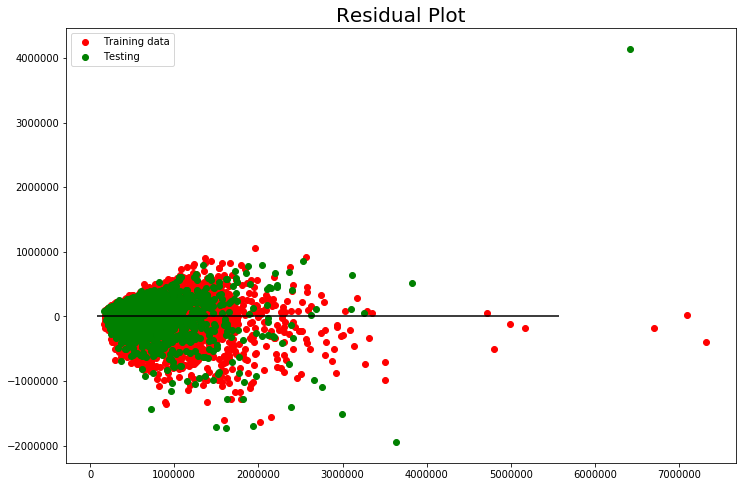

In [35]:
residuals_plot(gb_regressor_100, X_train, y_train, X_test, y_test)

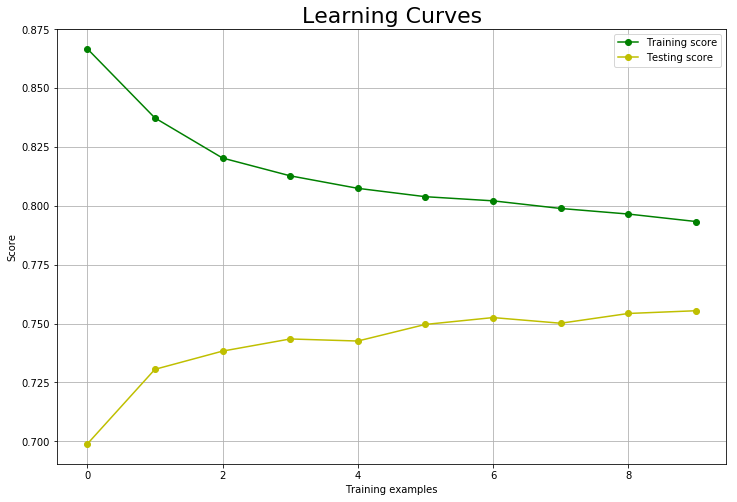

In [36]:
train_score, test_score = draw_learning_curves(X_train, y_train, gb_regressor_100, cv)